# LGMVIP - Data Science Intern
## Advanced Level Task 1 - Develop a Neural Network that can read Handwritting
## Author - Pragati Bhakkad

### Importing the required libraries :-

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt

### Loading the MNIST Handwritten Digit data

In [10]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape

(60000, 28, 28)

### Previewing the data (The data is in pixel format)

<ipython-input-11-930e9b2aa963>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


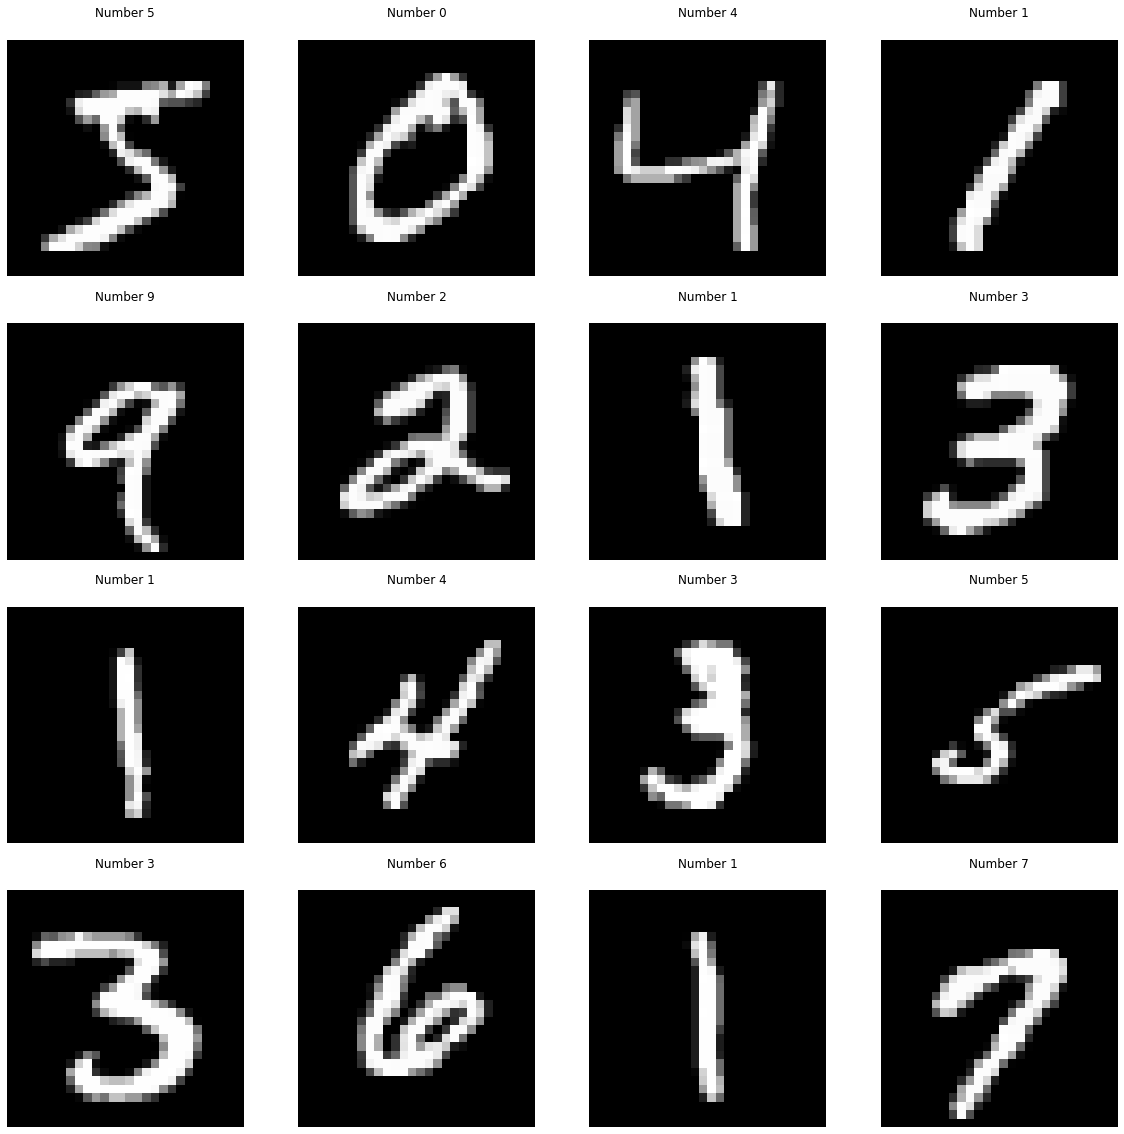

In [11]:
fig, axs = plt.subplots(4, 4, figsize = (20, 20))
plt.gray()
for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))
fig.show()

### Reshaping the data for segregation

In [12]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)


### Segregating the data for training and testing

In [13]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


### Creating the Sequential model and adding layers 

In [14]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) 
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

### Model Compilation and Fitting

In [15]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2103 - accuracy: 0.9366
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0838 - accuracy: 0.9743
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0587 - accuracy: 0.9818
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0447 - accuracy: 0.9855
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0342 - accuracy: 0.9889
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0281 - accuracy: 0.9904
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0240 - accuracy: 0.9919
Epoch 8/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0217 - accuracy: 0.9924
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0195 - accuracy: 0.9932
Epoch 10/10
1875/1875 [==============================] - 19s 10m

### Evaluating the model using the test data

In [16]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0642 - accuracy: 0.9855


[0.06421256065368652, 0.9854999780654907]

## Net Accuracy of the model :- 97.55%
## Net loss :- 5.42%